<a href="https://colab.research.google.com/github/labidz/ANN_CNN_ML/blob/main/friut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='fruit.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('fruit.zip')
f.keys()
!unzip fruit.zip

In [ ]:
import numpy as np
import pandas as pd 

In [ ]:
TRAIN_DIR = '/content/train/train'

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as L
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

import matplotlib.pyplot as plt

In [ ]:
img_datagen = ImageDataGenerator(rescale=1./255,
                                vertical_flip=True,
                                horizontal_flip=True,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.1,
                                validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = img_datagen.flow_from_directory(TRAIN_DIR,
                                                 shuffle=True,
                                                 batch_size=32,
                                                 subset='training',
                                                 target_size=(100, 100))

valid_generator = img_datagen.flow_from_directory(TRAIN_DIR,
                                                 shuffle=True,
                                                 batch_size=16,
                                                 subset='validation',
                                                 target_size=(100, 100))

Found 13493 images belonging to 33 classes.
Found 3361 images belonging to 33 classes.


In [ ]:
model = Sequential()

model.add(L.Conv2D(64, (5, 5), activation='relu', padding='Same', input_shape=(100, 100, 3)))
model.add(L.Conv2D(64, (5, 5), activation='relu', padding='Same'))
model.add(L.MaxPool2D((2, 2)))
model.add(L.Dropout(0.25))

model.add(L.Conv2D(128, (3, 3), activation='relu', padding='Same'))
model.add(L.Conv2D(128, (3, 3), activation='relu', padding='Same'))
model.add(L.MaxPool2D((2, 2), strides=(2, 2)))
model.add(L.Dropout(0.25))

model.add(L.Flatten())
model.add(L.Dense(256, activation='relu'))
model.add(L.Dropout(0.5))
model.add(L.Dense(33, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max',
                                        restore_best_weights=True)
            
history = model.fit(train_generator, validation_data=valid_generator,
                   steps_per_epoch=train_generator.n//train_generator.batch_size,
                   validation_steps=valid_generator.n//valid_generator.batch_size,
                    callbacks=[early],
                   epochs=10)

Epoch 1/10
421/421 [==============================] - 84s 170ms/step - loss: 2.3603 - accuracy: 0.2555 - val_loss: 1.1697 - val_accuracy: 0.6161
Epoch 2/10
421/421 [==============================] - 60s 143ms/step - loss: 1.0783 - accuracy: 0.6034 - val_loss: 0.5254 - val_accuracy: 0.8027
Epoch 3/10
421/421 [==============================] - 60s 143ms/step - loss: 0.6198 - accuracy: 0.7765 - val_loss: 0.4536 - val_accuracy: 0.8381
Epoch 4/10
421/421 [==============================] - 60s 143ms/step - loss: 0.4879 - accuracy: 0.8237 - val_loss: 0.2826 - val_accuracy: 0.8932
Epoch 5/10
421/421 [==============================] - 70s 166ms/step - loss: 0.3858 - accuracy: 0.8623 - val_loss: 0.3172 - val_accuracy: 0.8815
Epoch 6/10
421/421 [==============================] - 60s 142ms/step - loss: 0.3226 - accuracy: 0.8878 - val_loss: 0.4122 - val_accuracy: 0.8637
Epoch 7/10
421/421 [==============================] - 70s 166ms/step - loss: 0.3026 - accuracy: 0.8961 - val_loss: 0.1424 - val_ac

Accuracy:  0.9294257760047913


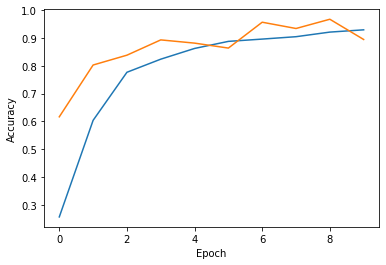

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
print("Accuracy: ",max(history.history['accuracy']))
plt.show()